In [1]:
import os
from torchvision.datasets import ImageFolder, DatasetFolder
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torchsummary import summary
import torch.nn as nn
import torch
from torchvision.models import MobileNet_V3_Large_Weights

res = {}

for split in ["train", "valid", "test"]:
    print(f"---------- {split} ----------")
    classes = os.listdir("00_base/data_CT/"+split)
    res[split] = {}
    
    for class_name in classes:
        class_path = os.path.join("00_base/data_CT", split, class_name)
        class_num = len(os.listdir(class_path))
        print(f"{class_name}: {class_num} images")
        res[split][class_name] = class_num
print()
for class_name in classes:
    class_total = sum(res[split][class_name] for split in res)
    print(f"{class_name}: {class_total} images in total")

---------- train ----------
adeno: 195 images
largecell: 115 images
normal: 148 images
squamouscell: 155 images
---------- valid ----------
adeno: 23 images
largecell: 21 images
normal: 13 images
squamouscell: 15 images
---------- test ----------
adeno: 120 images
largecell: 51 images
normal: 54 images
squamouscell: 90 images

adeno: 338 images in total
largecell: 187 images in total
normal: 215 images in total
squamouscell: 260 images in total


In [2]:
transform = MobileNet_V3_Large_Weights.IMAGENET1K_V2.transforms()

train = ImageFolder("00_base/data_CT/train", transform=transform)
val = ImageFolder("00_base/data_CT/valid", transform=transform)
test = ImageFolder("00_base/data_CT/test", transform=transform)

full = train + val + test


In [3]:
if not (os.path.exists("03_baseline_cnn/data/images.pt") and os.path.exists("03_baseline_cnn/data/labels.pt")):

    import numpy as np

    images = torch.tensor(np.array([data[0] for data in full]))
    labels = torch.tensor(np.array([data[1] for data in full]))

    new_indices = torch.randperm(images.size(0))
    images = images[new_indices]
    labels = labels[new_indices]

    print(f"Images shape: {images.shape}")
    print(f"Labels shape: {labels.shape}")

    torch.save(images, "03_baseline_cnn/data/images.pt")
    torch.save(labels, "03_baseline_cnn/data/labels.pt")

else:
    images = torch.load("03_baseline_cnn/data/images.pt")
    labels = torch.load("03_baseline_cnn/data/labels.pt")
    print(f"Loaded images shape: {images.shape}")
    print(f"Loaded labels shape: {labels.shape}")

Loaded images shape: torch.Size([1000, 3, 224, 224])
Loaded labels shape: torch.Size([1000])


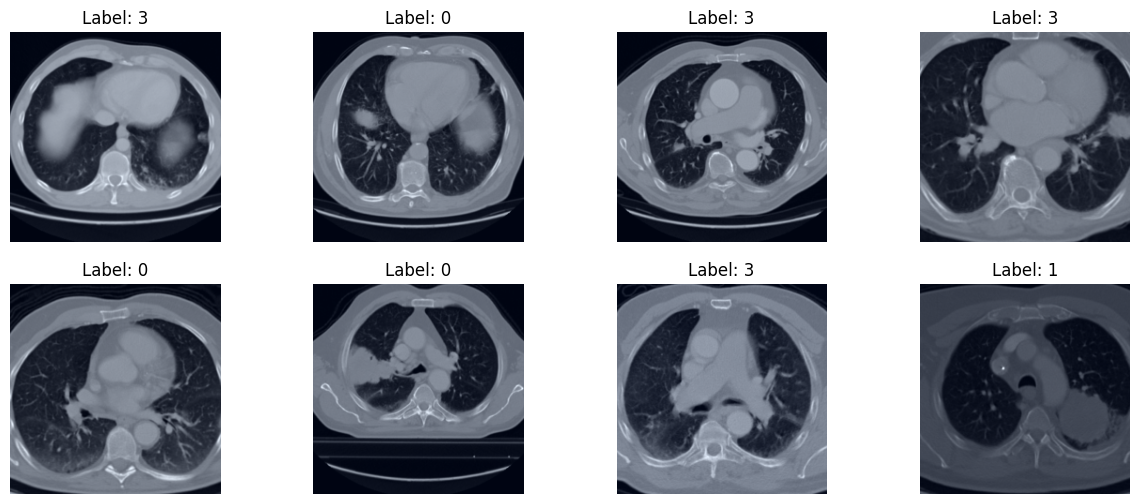

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 4, figsize=(15, 6))
axs = axs.flatten()

for i, ax in enumerate(axs):
    img = images[i]
    img = (img - img.min()) / (img.max() - img.min())  # Normalize to [0, 1]
    img = img.permute(1, 2, 0)
    ax.imshow(img)
    ax.set_title(f"Label: {labels[i]}")
    ax.axis('off')


In [5]:
labels_unique, counts = torch.unique(labels, return_counts=True)
print("\nLabel distribution:")
for label, count in zip(labels_unique, counts):
    print(f"Label {label.item()}: {count.item()} images")


Label distribution:
Label 0: 338 images
Label 1: 187 images
Label 2: 215 images
Label 3: 260 images
